In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os


In [2]:
#Importing all data:

data =  np.loadtxt("pca-data-2d.dat.txt", delimiter = '  ' )

data3d = np.loadtxt("pca-data-3d.txt", delimiter = ',', skiprows = 1)

datadyn = np.loadtxt("expDat.txt", delimiter = ',', skiprows = 1, usecols = np.arange(1,21))

$\textbf{Exercise 1: Basic PCA}$


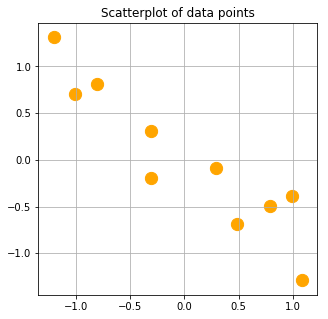

In [3]:
#Center the 2d-data:

data -= data.mean(axis = 0)

#Make a scatterplot of the centred data:

def scatterplot_data (data):
    
    plt.figure(figsize = (5, 5))
    
    plt.scatter(data[:,0], data[:,1], c = 'orange', s = 150)
    plt.title("Scatterplot of data points")
    plt.grid()
    
scatterplot_data(data)

The Eigenvalues are: 
[1.28402771 0.0490834 ] 
The Eigenvectors are: 
[[ 0.73517866  0.6778734 ]
 [-0.6778734   0.73517866]]
The transformed data is: 
[[ 0.82797019 -0.17511531]
 [-1.77758033  0.14285723]
 [ 0.99219749  0.38437499]
 [ 0.27421042  0.13041721]
 [ 1.67580142 -0.20949846]
 [ 0.9129491   0.17528244]
 [-0.09910944 -0.3498247 ]
 [-1.14457216  0.04641726]
 [-0.43804614  0.01776463]
 [-1.22382056 -0.16267529]]


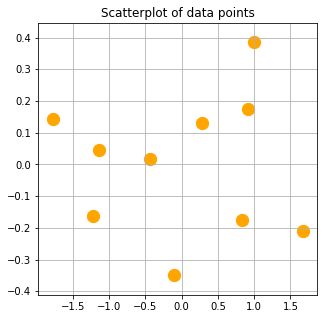

In [4]:
def pca(data):
    
    #Solve the eigenvalue problem:
    
    evals, evecs = np.linalg.eigh(np.cov(data.T))
    
    #Return data in new basis:
    #Since evecs is orthonormalbasis we have evecs.T = Inv(evecs):
    
    return evals, evecs, new_data

print("The Eigenvalues are: \n{0} \nThe Eigenvectors are: \n{1}\
\nThe transformed data is: \n{2}".format(pca(data)[0], pca(data)[1], pca(data)[2]))

#Scatterplot in the eigenvector space:

scatterplot_data(pca(data)[2])

<Figure size 432x288 with 0 Axes>

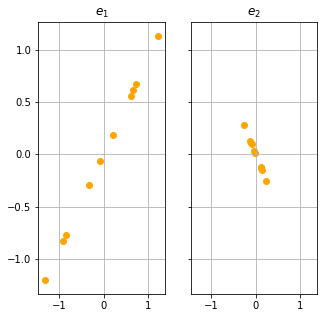

In [5]:
#Part(c): Data compression:

#Projections: x = alpha_1 e_1 + alpha_2 e_2 and either e_1/2_2 == 0:

evecs = pca(data)[1]
new_data = pca(data)[2]

p1 = np.array([point * evecs[0] for point in new_data[:,0]])
p2 = np.array([point * evecs[1] for point in new_data[:,1]])

plt.suptitle("projections onto the different eigenvalues")

fig, axs = plt.subplots(1,2, figsize  = (5,5), sharex = True, sharey = True)

axs[0].scatter(p1[:,0], p1[:,1], c = 'orange')
axs[0].grid()
axs[0].set_title("$e_1$")
axs[1].scatter(p2[:,0], p2[:,1], c = 'orange')
axs[1].set_title("$e_2$")
axs[1].grid()

This matches our expectations. When you look at the data-cloud form the first plot we can clearly see that the PCs point in these two directions. Since the variance is smaller in the direction of the second eigenvector, we expect the values there to be smaller, which is in fact the case.

$\textbf{Exercise 2: 3-dimensional PCA}$

In [6]:
print("The PCs are: \n{}".format(pca(data3d)[1]))

The PCs are: 
[[-0.85087048  0.51120047  0.12121678]
 [ 0.52533684  0.83065188  0.1844957 ]
 [ 0.00637466 -0.22066159  0.9753296 ]]


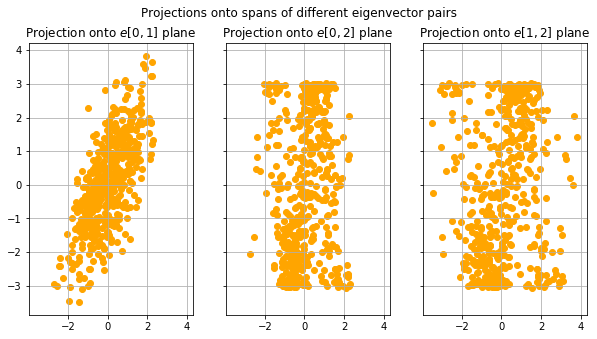

In [7]:
#Projections: x = alpha_1 e_1 + alpha_2 e_2 + alpha_3 e_3 and either e_1/e_2/e_3 == 0:

evecs3d = pca(data3d)[1]
ndata3d = pca(data3d)[2]

def projectionS(evecs, data, hyperplane):
    
    """
    Returns the projection of a set of data to a subset of eigenvectors
    @params:
    evecs: the eigenvectors
    data: the data in the eigenvector basis
    hyperplane: the hyperplane on which to project
    RETURN: An np.array containing the 
    
    """
    
    evecs_proj = np.zeros((len(hyperplane), evecs.shape[1]))
    
    for eI, e in np.ndenumerate(hyperplane):
        
        evecs_proj[eI] = evecs[e,:]
    
    return data.dot(evecs_proj.T)

#Get the projections:

projections = [projectionS(evecs3d, ndata3d, hyperplane = plane) \
                           for plane in [[0,1], [0,2], [1,2]]]


#Plot the results:

def plot_projections(evecs, data):

    fig, axs = plt.subplots(1,3, figsize = (10,5), sharex = True, sharey = True)

    plt.suptitle("Projections onto spans of different eigenvector pairs")
    
    for i in np.arange(3):
        
        #proj_data = projection(evecs, data)[:,:,i]
        #proj_data = np.delete(proj_data, i, axis = 1) #kills i-th column
        
        #axs[i].scatter(proj_data[:,0], proj_data[:,1], c = 'orange')
        axs[i].scatter(projections[i][:,0], projections[i][:,1], c = 'orange')
        axs[i].grid()
        axs[i].set_title("Projection onto $e{}$ plane".format([[0,1], [0,2], [1,2]][i]))
        
plot_projections(evecs3d, ndata3d)

In [8]:
#Part(c):

evecs_temp = evecs3d.copy()
evecs_temp[1:3,:] = np.zeros((2,3))

one_dir = ndata3d.dot(evecs_temp.T)
two_dir = projectionS(evecs3d, ndata3d, [0,1])
three_dir = pca(data3d)[2]


#Comment-in for teh results:

#print("One direction: \n{0} \nTwo directions: \n{1} \
#\nThreedirections \n{2}".format(one_dir, two_dir, three_dir))


$\textbf{Part 3: Projections of a dynamical system}$

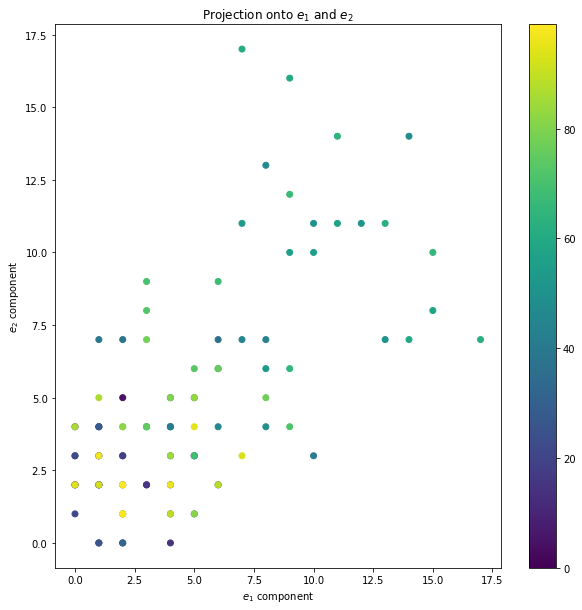

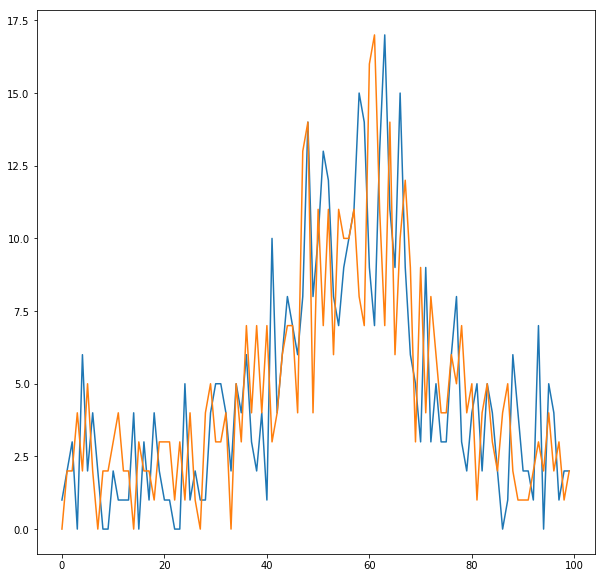

In [9]:
#Part(a): Finding the PCs:

evalsdyn, evecsdyn, ndatadyn = pca(datadyn) #This will give all twenty components

#Comment-int for results:
#print("The first 5 principal components are: \n{}".format(evecsdyn[:5,:]))

#Part (b):

proj_dyn = [projectionS(evecsdyn, ndatadyn, hyperplane = plane) \
                           for plane in [[0], [1], [0,1]]]

#Scatterplot:

plt.figure(figsize = ((10,10)))

plt.scatter(proj_dyn[2][:,0], proj_dyn[2][:,1], c = np.arange(proj_dyn[2].shape[0]))
plt.colorbar()
plt.title("Projection onto $e_1$ and $e_2$")
plt.xlabel("$e_1$ component")
plt.ylabel("$e_2$ component")

#Line plots:

plt.figure(figsize = ((10,10)))
plt.plot(proj_dyn[0])
plt.plot(proj_dyn[1])


We can see that there is a lot of correlation in the towards the middle (in temporal terms) but very little correlation toward the end and the beginning of the time series. This should be confirmed when we look at the covariance matrix.

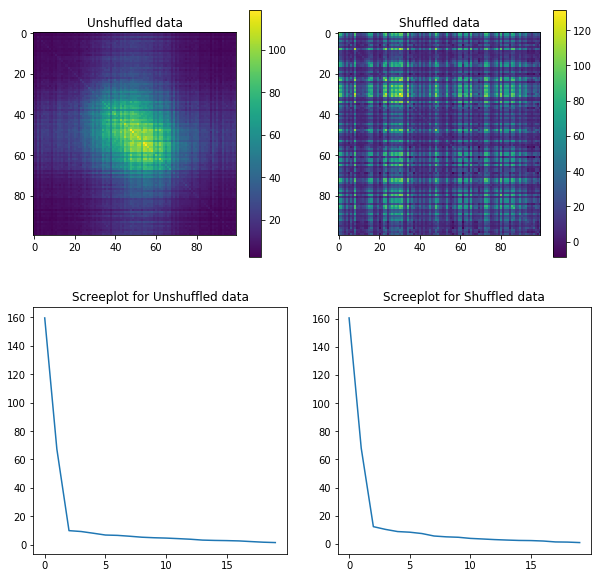

In [10]:
#Part(c): 


#Shuffling the data:

def shuffle_cols (data):
    
    temp_data = data.copy()
    
    for col in temp_data.T:
        
        np.random.shuffle(col)
            
    return temp_data


#Get the eigenvalues and sort them:

evalsdyn_temp = evalsdyn.copy()
evalsdyn_temp.sort()
evalsdyn_temp = evalsdyn_temp[::-1]

evals_shuffled = pca(shuffle_cols(ndatadyn))[0]
evals_shuffled.sort()
evals_shuffled = evals_shuffled[::-1]

#Plotting results:

fig, axs = plt.subplots(2,2, figsize = (10,10))

im0 = axs[0,0].imshow(np.cov(ndatadyn))
axs[0,0].set_title("Unshuffled data")
plt.colorbar(im0, ax = axs[0,0])

im1 = axs[0,1].imshow(np.cov(shuffle_cols(ndatadyn)))
axs[0,1].set_title("Shuffled data")
plt.colorbar(im1, ax = axs[0,1])

im2 = axs[1,0].plot(evalsdyn_temp)
axs[1,0].set_title("Screeplot for Unshuffled data")


im3 = axs[1,1].plot(evals_shuffled)
axs[1,1].set_title("Screeplot for Shuffled data")


plt.show()

Shuffling the rows should not make a difference, since it will not change the ordering of eigenvalues.

$\textbf{Part 4: Image data compression and reconstruction}$

In [12]:
from PIL import Image
from glob import glob
import re 

#Import the respective images using regexp:

def import_images():

    nature = []
    buildings = []

    for img in glob("[b,n]*.jpg"):
        
        bitmap = np.array(Image.open(img))
        
        nature.append(bitmap) if re.match("n", img) else buildings.append(bitmap)
    
    return {"nature": nature, "buildings": buildings}

#Part(a): Sampling the images:

from sklearn.feature_extraction import image

#Use PatchExtractor:

def image_patches(imgs, max_patches, patch_size):
    
    result = np.zeros((len(imgs) * max_patches, np.prod(patch_size)))
    print(result.shape)
    
    row = 0
    
    for img in imgs:
    
        patchex = image.extract_patches_2d(img, max_patches = max_patches, \
                                           patch_size = patch_size)
        
        #Have to be careful with smaller images:
        
        sh = patchex.shape[0]
        
        result[row:row + sh,:] = patchex.reshape(sh, np.prod(patch_size))
        
        row += 500
        
    return result
        

    
    
patches_b = image_patches((import_images()["buildings"]), 500, (16,16))

patches_n = image_patches((import_images()["nature"]), 500, (16,16))

(0, 256)
(0, 256)


In [13]:
#Part(b): Do the PCS:

nature_evals, pc_nature = pca(patches_n)[:2]
building_evals, pc_building = pca(patches_b)[:2]

print(pc_nature[:24].shape)

def plot_scene_pcs (data, cmap):
    
    x, y = (0,0)
    
    fig, axs = plt.subplots(4,6, figsize = (10,10))
    
    plt.suptitle("The first 24 Pcs")
    
    plt.tight_layout()
    
    for pc in (data[:24,:]).reshape(24,16,16):
        
        im = axs[y,x].imshow(pc, cmap = cmap)
        axs[y,x].set_title("PC number {}".format((y+1) * (x+1)))
        plt.colorbar(im, ax = axs[y,x])
        
        
        if x <=4:
            
           x += 1
        
        else:
            
           x = 0
           y += 1
        
    
plot_scene_pcs(pc_nature, cmap = 'viridis')
plot_scene_pcs(pc_building, cmap = 'hot' )





/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:390: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Degrees of freedom <= 0 for slice
  """
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


LinAlgError: Array must not contain infs or NaNs

In [ ]:
#Part(c):



fig, axs = plt.subplots(1,2, figsize = (10,10))

plt.suptitle("Screeplots for Nature and Buildings")



axs[0].plot(np.sort(nature_evals)[::-1][:10])
axs[0].set_title("Nature")
axs[1].plot(np.sort(building_evals)[::-1][:10])
axs[1].set_title("Buildings")



Based on these results we can deduce that the first dimension is ovewhelmingly important and that, by comparison, all other dimensions are negligible

In [ ]:
#Part(d)



In [ ]:
pwd()

#img = plt.imread("b8.jpg")


